In [1]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt
import cmath 
import random
import os
from scipy import signal


1- Lecture, affichage e l"ajout du bruit GAUSSIEN a l'image :

(512, 512)

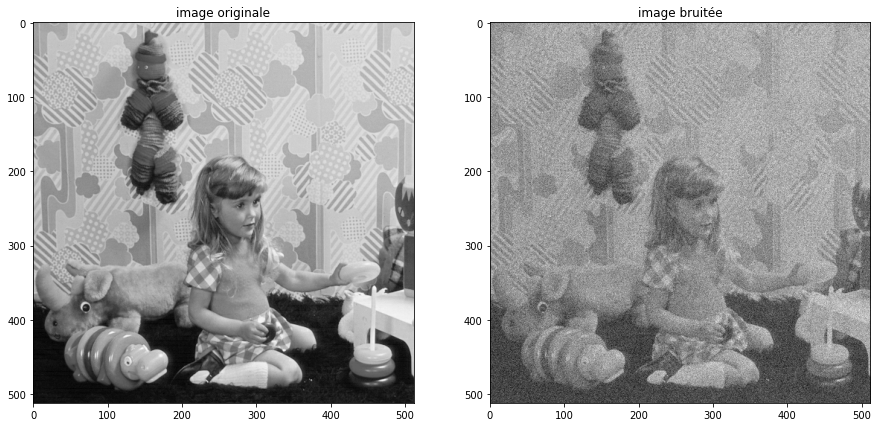

In [2]:
isabelle = plt.imread("isabelle.bmp")

Bruit_g=np.random.normal(0,0.1,isabelle.shape)

isabelle=isabelle/255 # normalizer l'echelle des niveau de gris de l'image par rapport au bruit 

isabelle_Bg=isabelle+Bruit_g

fig1=plt.figure(figsize=(15,15))
fig1.add_subplot(1,2,1)
plt.imshow(isabelle,cmap='gray')
plt.title('image originale')
fig1.add_subplot(1,2,2)
plt.imshow(isabelle_Bg,cmap='gray')
plt.title('image bruitée')

isabelle.shape



2-application des filtres : 

A-Filtre moyenneur : 

0.5021470278338793
0.596078431372549


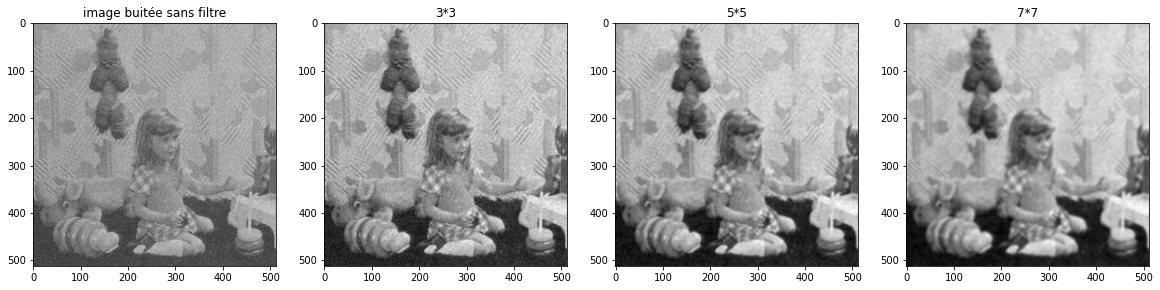

In [3]:
isabelle_moy_3=cv.blur(isabelle_Bg,(3,3))


isabelle_moy_5=cv.blur(isabelle_Bg,(5,5))

isabelle_moy_7=cv.blur(isabelle_Bg,(7,7))

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,4,1)
plt.imshow(isabelle_Bg,cmap='gray')
plt.title("image buitée sans filtre")
fig.add_subplot(1,4,2)
plt.imshow(isabelle_moy_3,cmap="gray")
plt.title('3*3')
fig.add_subplot(1,4,3)
plt.imshow(isabelle_moy_5,cmap="gray")
plt.title('5*5')
fig.add_subplot(1,4,4)
plt.imshow(isabelle_moy_7,cmap="gray")
plt.title('7*7')
  # pour comparer les valeurs des bords et voir comment ils sont traités 
print(isabelle_moy_3[0][0])
print(isabelle[0][0])


*** Commentaire *** =  Ce filtre permet de réduire le bruit dans l'image, ce qui rend les zones homogènes plus lisses. Par contre, les contours sont fortement dégradés, et les structures trop fines  devenienenet moins visibles, Plus la taille du filtreaugmente, plus lesdétails de l’image sont floutés. Le filtremoyenneur est un filtrepasse-bas peu robuste.
*** la taille des images obtenues est la meme que l'image originale , la fonction cv.blur utilise le padding pour traiter les bords en utilisant borderType = BORDER_DEFAULT . ***


*** Changement de methode ***
On cree une fonction qui calcule le produit de convolution entre l"image bruité et le mask, ceci en rajoutant  deux rangées de zéros virtuels si la taille du mask est 3 autour de la matrice de l'image, donc on aura la meme taille que l'image de depart ou bien on n'autorise pas l'ajout et  on reduit la taille de l'image .

Text(0.5, 1.0, 'image filtré de taille 508*508')

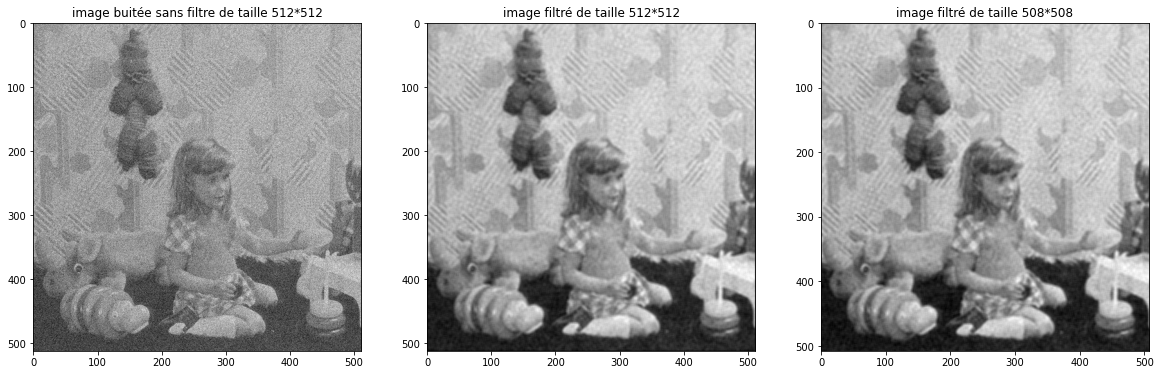

In [4]:
#exemple du mask 5*5
mask = (1/25) * np.ones((5,5))
#on veut garder la meme taille que 
filtermoyfill = signal.convolve2d(np.array(isabelle_Bg),mask,mode='same',boundary='fill')
#on reduit la taille de l'image d'entré 
filtermoyvalid = signal.convolve2d(np.array(isabelle_Bg), mask, mode='valid')
fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1,3,1)
plt.imshow(isabelle_Bg,cmap='gray')
plt.title("image buitée sans filtre de taille 512*512")
fig.add_subplot(1,3,2)
plt.imshow(filtermoyfill,cmap='gray')
plt.title("image filtré de taille 512*512")
fig.add_subplot(1,3,3)
plt.imshow(filtermoyvalid,cmap='gray')
plt.title("image filtré de taille 508*508")



***L’option mode='same' indique que la matrice de sortie doit avoir la même taille que la matrice d’entrée
   L’option boundary='fill' correspond à l’ajout d’une rangée de zéros virtuels sur les bords. 


2-Soustraction 

Text(0.5, 1.0, 'Soustraction du filtre de taille 7 ')

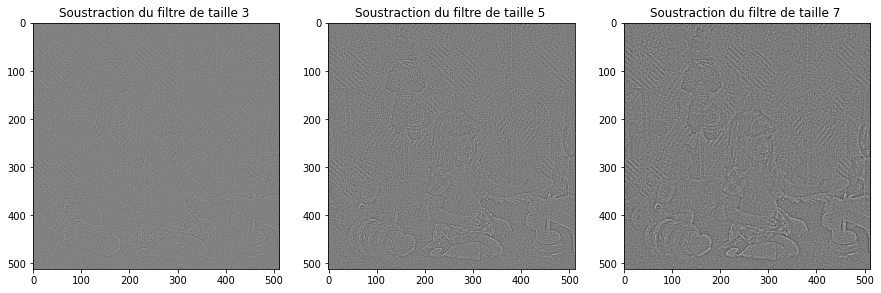

In [5]:
soustraction_3=isabelle_Bg-isabelle_moy_3
soustraction_5=isabelle_Bg-isabelle_moy_5
soustraction_7=isabelle_Bg-isabelle_moy_7
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,1)
plt.imshow(soustraction_3,cmap='gray')
plt.title("Soustraction du filtre de taille 3 ")
fig.add_subplot(1,3,2)
plt.imshow(soustraction_5,cmap='gray')
plt.title("Soustraction du filtre de taille 5 ")
fig.add_subplot(1,3,3)
plt.imshow(soustraction_7,cmap='gray')
plt.title("Soustraction du filtre de taille 7 ")

*Commentaire* : 
  -  la soustraction montre la difference entre l'image originale et l'image filtré
  - on voit que dans le filtre de taille 3 la difference est peu remarquable  ceci est du au fait que il y a beaucoup des détails manquants sur les images filtrées par rapport à l'image originale.
  - en augmentant la taille du filtre moyenneur plus la difference entre l'image originale et l'image filtré  est remarquable car  plus on augmente la taille du FILTRE plus l'image est floutée et plus on perd les detailles de l 'image. 
  -  on remarque aussi que les contours sont les elements qui sont mise en evidence le plus dans les images resultantes ceci est due au fait que les filtres moyenneurs degradent les contours et les rendent moins visibles dans l'image filtré ie les pixels du contours subissent un grand changement en comparant avec les autres pixels. 

*Conclusion* : Les filtres moyenneurs sont des filtres lineaire sont des **filtres passe bas** ,  calculent la moyenne, éventuellement pondérée, des pixels situés dans le voisinage de chaque pixel. Cette famille de filtres permet de réduire le bruit dans l'image, ce qui rend **les zones homogènes plus lisses** . Par contre, **les contours sont fortement dégradés**, et les structures trop fines peuvent devenir moins visibles.
**plus on augmente la taille du filtre moyenneur plus l'image filtrée est floue, plus on perd les détails de l'image (lissage).**

B-Filtre gaussien : 

1-realisation d'un filtre gaussien: 

Text(0.5, 1.0, 'image aveec le filtre gaussien 3*3')

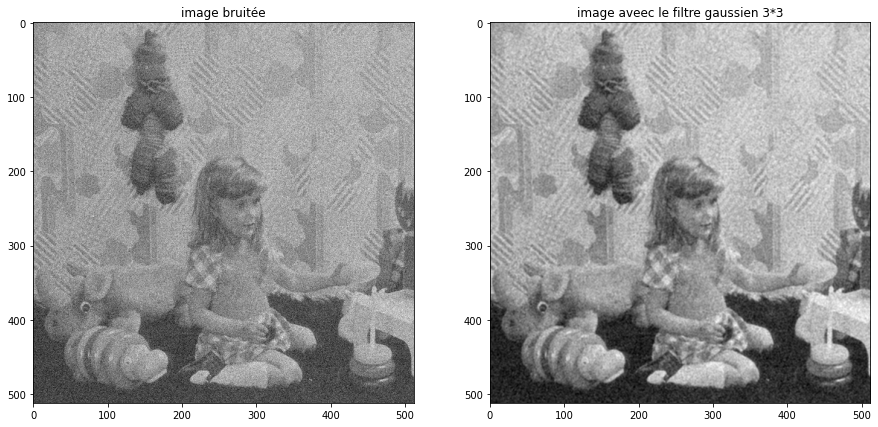

In [6]:
isabelle_g3 = cv.GaussianBlur(isabelle_Bg,(3,3),1)
fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1,2,1)
plt.imshow(isabelle_Bg,cmap='gray')
plt.title("image bruitée")
fig.add_subplot(1,2,2)
plt.imshow(isabelle_g3,cmap='gray')
plt.title("image aveec le filtre gaussien 3*3")

 ***L'effet de ce filtre sur l'image est assez similaire au filtre moyenneur, mais la moyenne est pondérée dans le sens ou les pixels près du pixel central on un effet ou un "poids" plus important que ceux qui sont situés plus loin donc les contours sont moins degradés dans ce cas et les zones homogenes sont plus lisses .


Text(0.5, 1.0, 'Filtre Gaussien 9*9 avec ecart type 1 ')

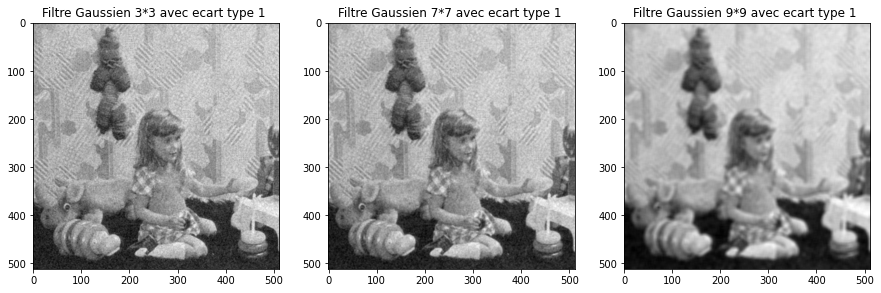

In [7]:
isabelle_g3 = cv.GaussianBlur(isabelle_Bg,(3,3),1)
isabelle_g7_= cv.GaussianBlur(isabelle_Bg,(7,7),1)
isabelle_g9 = cv.GaussianBlur(isabelle_Bg,(9,9),5)

fig = plt.figure(figsize=(15, 15))
fig.add_subplot(1,3,1)
plt.imshow(isabelle_g3,cmap='gray')
plt.title("Filtre Gaussien 3*3 avec ecart type 1 ")
fig.add_subplot(1,3,2)
plt.imshow(isabelle_g7_,cmap='gray')
plt.title("Filtre Gaussien 7*7 avec ecart type 1 ")
fig.add_subplot(1,3,3)
plt.imshow(isabelle_g9,cmap='gray')
plt.title("Filtre Gaussien 9*9 avec ecart type 1 ")

*B.2 L'influence de la taille du filtre et de la valeur de l'ecart type* : 
** Le degré de lissage est déterminé par l’écart-type associé au filtre gaussien mais alors plus σ est élevé plus il faut prendre un filtre grand, **Idéalement**, la largeur du filtre h devrait être **(6σ + 1)× (6σ + 1)** arrondi a l’entier supérieur le plus proche..

B.3 on choisi le mask ((7,7),1) car le bruit est  bien reduit et les contours ne sont pas trop degradés 
*Soustraction : 

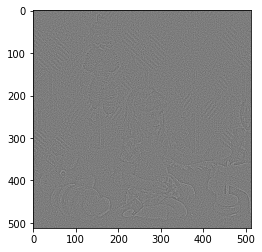

In [8]:
sous_gaussien = isabelle_Bg - isabelle_g7_
plt.imshow(sous_gaussien,cmap='gray')

*Commentaire* :
Il y a moins de différence par rapport à l'image filtrée par le filtre moyenneur, c'est-à-dire il y a moins de détails manquants, le filtre gaussien a donc bien **réduit le bruit** tout en **préservant les contours**.

C-Filtre Mediane 

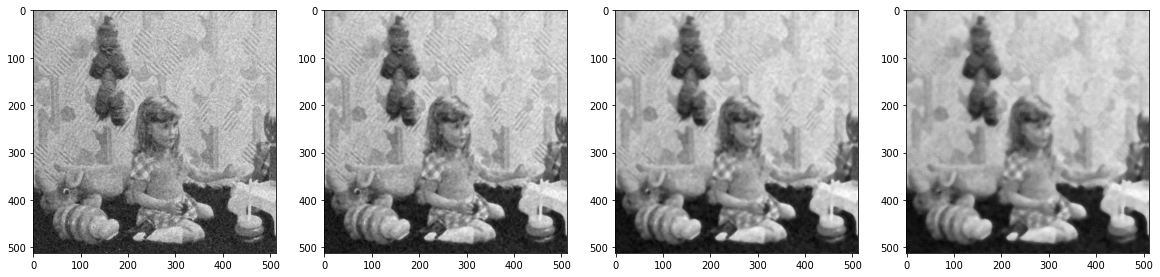

In [17]:
fig = plt.figure(figsize=(20, 20))
isabelle = plt.imread("isabelle.bmp")

Bruit_g=np.random.normal(0,0.1*255,isabelle.shape)


isabelle_Bg=isabelle+Bruit_g
isabelle_Bg=np.uint8(isabelle_Bg)
j=1
i=3 
while(i<10):
    isabelle_median = cv.medianBlur(isabelle_Bg,i)
    isabelle_median= np.uint8(isabelle_median)
    fig.add_subplot(1,4,j)
    plt.imshow(isabelle_median,cmap='gray')

    i=i+2
    j=j+1
    
     

Comparaison et Commentaire = au debut le filtre annule un peu le bruit et n'affecte pas trop les contour,  puis a chaque fois qu'on augmente la talle du filtre plus l'image devient plus floutée et on perd les contours et les detailles de l'image .

SOUSTRACTION

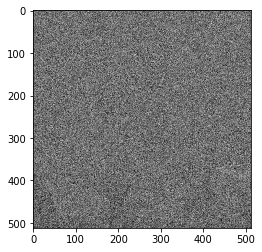

In [22]:
isabelle_median = cv.medianBlur(isabelle_Bg,3)
sous_median = isabelle_median - isabelle_Bg
plt.imshow(sous_median,cmap='gray')


*commentaaire*: Il y a une différence entre l'image filtrée et l'image originale qui est expliquée par l'élimination des détails de l'image causée par le floue rajouté par le filtre.

**3- COMPARAISON DES FILTRES**
- Les 3 filtres sont des filtres passe-bas pour la réduction de bruit , ils rajoutent du floue à l'image, éliminent ses détails et donc effectuent un lissage.

- Le filtre gaussien et le filtre moyenneur sont des filtres linéaires (filtrage par convolution), tandis que le filtre médian est non-linéaire qui fait intervenir les pixels voisins suivant une loi non-linéaire

- Le filtre *le mieux adapté* au bruit gaussien est le *filtre gaussian* ,La suppression du bruit gaussien implique de lisser la région interne distincte d’une image. Pour ce classique filtres linéaires tels que le filtre gaussien réduit efficacement le bruit mais flouter les bords de manière significative.

3-On refait le travail avec le bruit poivre et sel : 

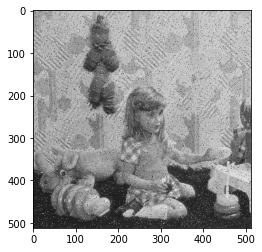

In [24]:
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300, 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(300 , 10000)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img
isabelle_ps = add_noise(isabelle)
plt.imshow(isabelle_ps,cmap='gray')

******Filtre moyenneur ***************

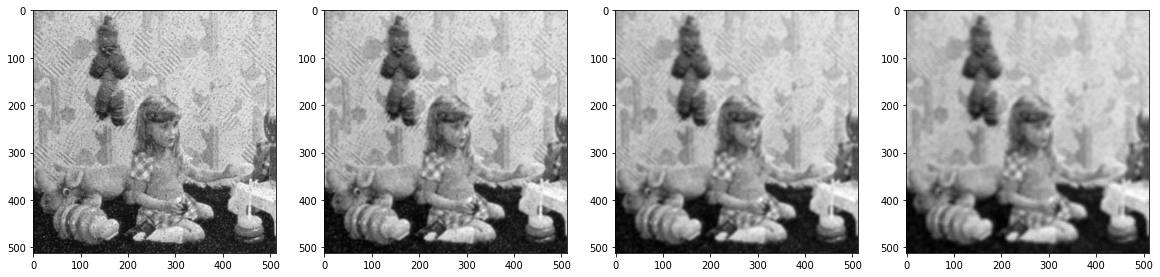

In [25]:
fig = plt.figure(figsize=(20, 20))

isabelle_ps = np.uint8(isabelle_ps)
i = 3
j=1
while(i<10):
     isabelle_median = cv.blur(isabelle_ps,(i,i))
     fig.add_subplot(1,4,j)
     plt.imshow(isabelle_median,cmap='gray')
     
     i=i+2
     j=j+1

*Comparaison et Commentaire* au debut le filtre annule un peu le bruit et n'affecte pas trop les contour,  puis a chaque fois qu'on augmente la talle du filtre plus l'image devient plus floutée et on perd les contours et les detailles de l'image .

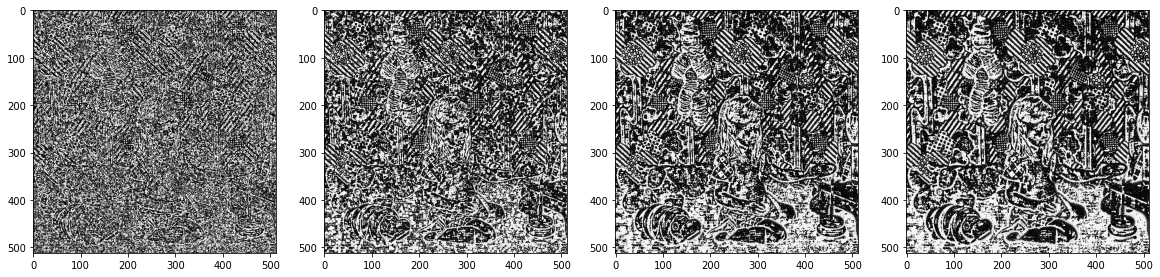

In [31]:
i = 3
j=1
fig = plt.figure(figsize=(20, 20))
while(i<10):
     isabelle_median = cv.blur(isabelle_ps,(i,i))
     sous_pv_blur= isabelle_ps - isabelle_median
     fig.add_subplot(1,4,j)
     plt.imshow(sous_pv_blur,cmap='gray')
     i=i+2
     j=j+1

*Commentaire* : 
  -  la soustraction montre la difference entre l'image originale et l'image filtré
  - on voit que dans le filtre de taille 3 la difference est peu remarquable  ceci est du au fait que il y a pas beaucoup des détails manquants sur les images filtrées par rapport à l'image originale.
  - en augmentant la taille du filtre moyenneur plus la difference entre l'image originale et l'image filtré  est remarquable car  plus on augmente la taille du FILTRE plus l'image est floutée et plus on perd les detailles de l 'image. 
  -  on remarque aussi que les contours sont les elements qui sont mise en evidence le plus dans les images resultantes ceci est due au fait que les filtres moyenneurs degradent les contours et les rendent moins visibles dans l'image filtré ie les pixels du contours subissent un grand changement en comparant avec les autres pixels.

2-BRUIT GAUSSIEN

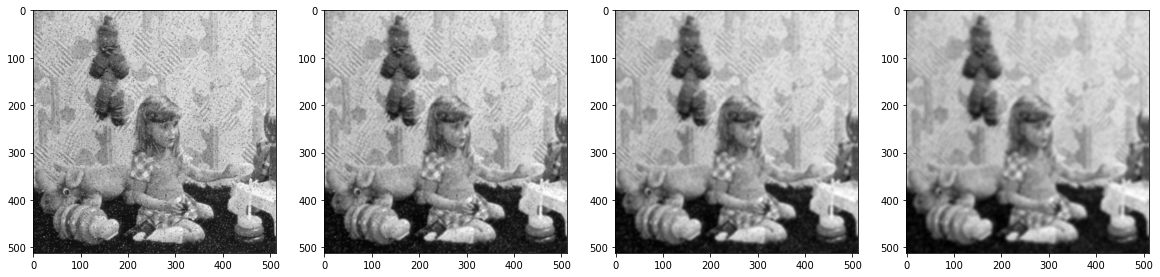

In [26]:
fig = plt.figure(figsize=(20, 20))
i = 3
j=1
while(i<10):
     isabelle_gau = cv.GaussianBlur(isabelle_ps,(i,i),j)
     fig.add_subplot(1,4,j)
     plt.imshow(isabelle_gau,cmap='gray')
     
     i=i+2
     j=j+1

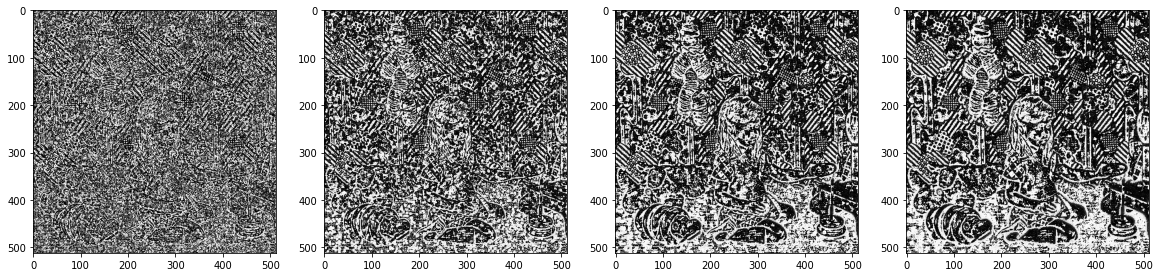

In [32]:
fig = plt.figure(figsize=(20, 20))
i = 3
j=1
while(i<10):
     isabelle_gau = cv.GaussianBlur(isabelle_ps,(i,i),j)
     sous=isabelle_ps-isabelle_gau
     fig.add_subplot(1,4,j)
     plt.imshow(sous,cmap='gray')
     
     i=i+2
     j=j+1

Le filtre Gaussien ne reduit pas vraiment me bruit de l'image mais il la rendre floutée, a chaque fois on augmente la taille du filtre l'image devient plus floutée et les contours sont degradés

en augmentant la taille du filtre gaussien plus la difference entre l'image originale et l'image filtré  est remarquable car  plus on augmente la taille du FILTRE plus l'image est floutée et plus on perd les detailles de l 'image

-Filtre Median : 

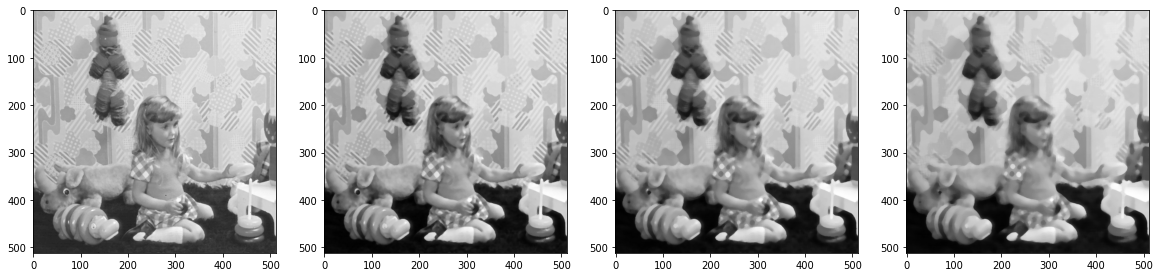

In [27]:
fig = plt.figure(figsize=(20, 20))

isabelle_ps = np.uint8(isabelle_ps)
i = 3
j=1
while(i<10):
     isabelle_median = cv.medianBlur(isabelle_ps,i)
     fig.add_subplot(1,4,j)
     plt.imshow(isabelle_median,cmap='gray')
     
     i=i+2
     j=j+1

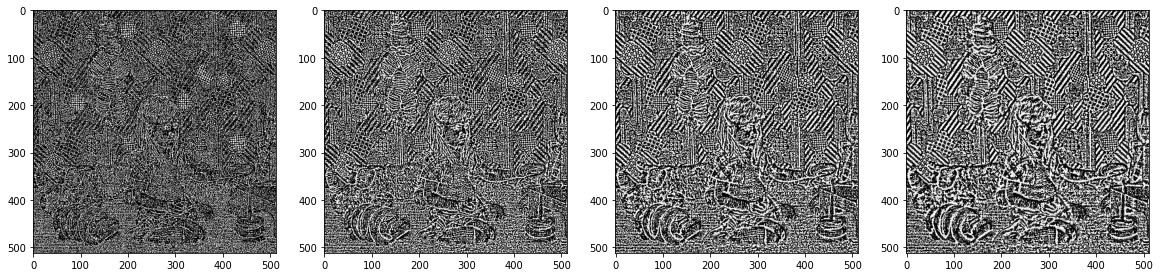

In [33]:
fig = plt.figure(figsize=(20, 20))

isabelle_ps = np.uint8(isabelle_ps)
i = 3
j=1
while(i<10):
     isabelle_median = cv.medianBlur(isabelle_ps,i)
     sous__=isabelle_ps-isabelle_median
     fig.add_subplot(1,4,j)
     plt.imshow(sous__,cmap='gray')
     
     i=i+2
     j=j+1

le filtre median est le plus adapté pour le bruit poivre et sel en effet ,il permet d'éliminer les valeurs aberrantes sans se limiter à faire un calcul de moyenne qui aura tendance à contaminer les valeurs voisines avec cette valeur aberrante et flouter l'imageil conserve aussi les contours de l'image .
dans la soustraction on voit que meme quand on augmente la taille du filtre on perd pas beaucoups de detailles par rapport au autres filtres .

**CONCLUSION** 

* Le filtre moyenneur a réduit le bruit impulsionnel mais a éliminé les contours. En augmentant la taille du filtre l'image devient floue et on perd ses détails, on remarque ceci dans la différence entre l'image originale et les images filtrées.

* Le filtre gaussien a réduit le bruit tout en évitant de floutter l'image, ce qui se voit dans les images représentant la différence entre l'image bruitée et l'image filtrée.

* Le filtre médian par contre a fait une très bonne réduction de bruit, il l'a nettoyer tout en préservant les contours de l'image, ce qui se voit dans les images représentant la différence entre l'image bruitée et l'image filtrée.